# Visualization of Comparing Num_graphs on MPNN and TokenGT

In [ ]:
import wandb
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem

# Initialize wandb API
api = wandb.Api()

# Define the project (replace with your actual project and entity)
entity = "L65_Project"
project = "transformer-graph-learner"

# Fetch runs
runs = api.runs(f"{entity}/{project}")

# Extract scores for all runs
tokengt_scores = {}
mpnn_scores = {}

for run in runs:
    if run.state == "running": continue
    if run.group not in ["tokengt-hypsearch_num_graphs", "gcn-hypsearch_num_graphs-debugged"]: continue
    cfg = run.config
    key = cfg["dataset"]["num_graphs"]
    print(run.name, key)
    if "best_test_loss" not in run.summary: continue
    best = run.summary["best_test_loss"]
    if run.group == "tokengt-hypsearch_num_graphs":
        if key not in tokengt_scores:
            tokengt_scores[key] = []
        tokengt_scores[key].append(best)
    else:
        if key not in mpnn_scores:
            mpnn_scores[key] = []
        mpnn_scores[key].append(best)

5 x 16 nodes (128-128) seed 1 lr 5e-05 1000
5 x 16 nodes (128-128) seed 2 lr 5e-05 1000
5 x 16 nodes (128-128) seed 3 lr 5e-05 1000
5 x 16 nodes (128-128) seed 4 lr 5e-05 1000
5 x 16 nodes (128-128) seed 2 lr 5e-05 2000
5 x 16 nodes (128-128) seed 1 lr 5e-05 2000
5 x 16 nodes (128-128) seed 4 lr 5e-05 2000
5 x 16 nodes (128-128) seed 1 lr 5e-05 5000
5 x 16 nodes (128-128) seed 2 lr 5e-05 5000
5 x 16 nodes (128-128) seed 3 lr 5e-05 5000
5 x 16 nodes (128-128) seed 4 lr 5e-05 5000
5 x 16 nodes (128-128) seed 4 lr 5e-05 10000
5 x 16 nodes (128-128) seed 1 lr 5e-05 10000
5 x 16 nodes (128-128) seed 2 lr 5e-05 10000
5 x 16 nodes (128-128) seed 4 lr 5e-05 20000
5 x 16 nodes (128-128) seed 2 lr 5e-05 20000
5 x 16 nodes (128-128) seed 1 lr 5e-05 20000
5 x 16 nodes (128-128) seed 2 lr 5e-05 100000
5 x 16 nodes (128-128) seed 1 lr 5e-05 100000
5 x 16 nodes (128-128) seed 4 lr 5e-05 100000
5 x 16 nodes (128-128) seed 3 lr 5e-05 100000
GCN 5 nodes (128-128) 50000 graphs seed 2 lr 0.0002 50000
GCN 

In [65]:
def line_plot(ax, scores, label, color, linestyle, marker=None):
    # Convert list of arrays to DataFrame (aligns different lengths with NaN padding)
    keys = scores.keys()
    keys = np.sort(list(keys))
    y, l, h = [], [], []
    for key in keys:
        values = scores[key]
        print(label, key, len(values))
        mean = np.mean(values)
        std = np.std(values)
        low = mean - std
        min = np.min(values)
        high = mean + std
        max = np.max(values)
        y.append(mean)
        l.append(min)
        h.append(max)
    ax.plot(keys, y, color=color, label=label, linestyle=linestyle, marker=marker)
    ax.fill_between(keys, l, h, color=color, alpha=0.2)
    # ax.errorbar(keys, y, [l,h], capsize=3, color=color, label=label, linestyle=linestyle, marker=marker)
    ax.set_xlabel("Number of graphs")
    ax.set_ylabel("Test loss")
    # ax.set_ylim(0.0)
    ax.set_xticks(np.append(ax.get_xticks(), keys))
    ax.set_xscale("log")
    # ax.set_yscale("log")
    ax.legend()

TokenGT 1000 4
TokenGT 2000 4
TokenGT 5000 4
TokenGT 10000 4
TokenGT 20000 4
TokenGT 50000 4
TokenGT 100000 4
MPNN 1000 4
MPNN 2000 4
MPNN 5000 4
MPNN 10000 4
MPNN 20000 4
MPNN 50000 4
MPNN 100000 4


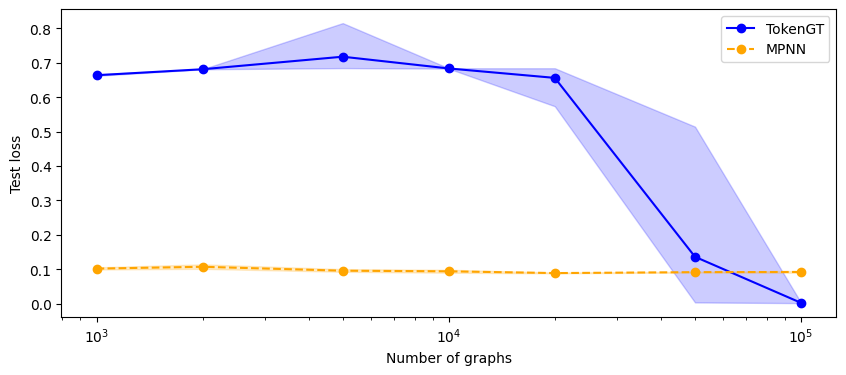

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
line_plot(ax, tokengt_scores, "TokenGT", "blue", "-", "o")
line_plot(ax, mpnn_scores, "MPNN", "orange", "--", "o")
plt.savefig("./figures/cmp_num_graphs.pdf")

# Visualization of Ecc vs. Layer vs. Test Loss

In [ ]:
import wandb
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem

# Initialize wandb API
api = wandb.Api()

# Define the project (replace with your actual project and entity)
entity = "L65_Project"
project = "transformer-graph-learner"

# Fetch runs
runs = api.runs(f"{entity}/{project}")

# Extract scores for all runs
all_scores = {}

for run in runs:
    if run.state == "running": continue
    if run.group != "intermediate-supervision-16-nodes": continue
    cfg = run.config
    key = (cfg["model"]["num_layers"], cfg["dataset"]["eccentricity"])
    print(run.name, key)
    if "best_test_loss" not in run.summary: continue
    best = run.summary["best_test_loss"]
    if key[0] not in all_scores:
        all_scores[key[0]] = {}
    if key[1] not in all_scores[key[0]]:
        all_scores[key[0]][key[1]] = []
    all_scores[key[0]][key[1]].append(best)

1 x 1 nodes (16-16) ecc 2 seed 1 lr 5e-05 int_sup False (1, 2)
2 x 1 nodes (16-16) ecc 2 seed 1 lr 5e-05 int_sup False (2, 2)
3 x 1 nodes (16-16) ecc 2 seed 1 lr 5e-05 int_sup False (3, 2)
4 x 1 nodes (16-16) ecc 2 seed 1 lr 5e-05 int_sup False (4, 2)
5 x 1 nodes (16-16) ecc 2 seed 1 lr 5e-05 int_sup False (5, 2)
1 x 1 nodes (16-16) ecc 7 seed 2 lr 5e-05 int_sup False (1, 7)
1 x 1 nodes (16-16) ecc 7 seed 1 lr 5e-05 int_sup False (1, 7)
2 x 1 nodes (16-16) ecc 7 seed 2 lr 5e-05 int_sup False (2, 7)
2 x 1 nodes (16-16) ecc 7 seed 1 lr 5e-05 int_sup False (2, 7)
3 x 1 nodes (16-16) ecc 7 seed 2 lr 5e-05 int_sup False (3, 7)
3 x 1 nodes (16-16) ecc 7 seed 1 lr 5e-05 int_sup False (3, 7)
1 x 1 nodes (16-16) ecc 3 seed 1 lr 5e-05 int_sup False (1, 3)
2 x 1 nodes (16-16) ecc 3 seed 1 lr 5e-05 int_sup False (2, 3)
4 x 1 nodes (16-16) ecc 7 seed 1 lr 5e-05 int_sup False (4, 7)
3 x 1 nodes (16-16) ecc 3 seed 1 lr 5e-05 int_sup False (3, 3)
4 x 1 nodes (16-16) ecc 3 seed 1 lr 5e-05 int_sup False

In [89]:
def ecc_layer_loss_plot(ax, scores, label, color, linestyle, marker=None):
    # Convert list of arrays to DataFrame (aligns different lengths with NaN padding)
    y, l, h = [], [], []
    key1s = scores.keys()
    key1s = np.sort(list(key1s))
    for key1 in key1s:
        values = scores[key1]
        print(label, key1, len(values))
        mean = np.mean(values)
        std = np.std(values)
        low = mean - std
        min = np.min(values)
        high = mean + std
        max = np.max(values)
        y.append(mean)
        l.append(min)
        h.append(max)
    ax.plot(key1s, y, color=color, label=label, linestyle=linestyle, marker=marker)
    ax.fill_between(key1s, l, h, color=color, alpha=0.2)
    # ax.errorbar(key1s, y, [l,h], capsize=3, color=color, label=label, linestyle=linestyle, marker=marker)
    ax.set_xlabel("Eccentricity")
    ax.set_ylabel("Test loss")
    # ax.set_ylim(0.0)
    # ax.set_xticks(np.append(ax.get_xticks(), key1s))
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    ax.legend()

num_layer = 1 2 4
num_layer = 1 3 4
num_layer = 1 4 4
num_layer = 1 5 4
num_layer = 1 6 4
num_layer = 1 7 4
num_layer = 1 8 4
num_layer = 1 9 4
num_layer = 2 2 4
num_layer = 2 3 4
num_layer = 2 4 4
num_layer = 2 5 4
num_layer = 2 6 4
num_layer = 2 7 4
num_layer = 2 8 4
num_layer = 2 9 4
num_layer = 3 2 4
num_layer = 3 3 4
num_layer = 3 4 4
num_layer = 3 5 4
num_layer = 3 6 4
num_layer = 3 7 4
num_layer = 3 8 4
num_layer = 3 9 4
num_layer = 4 2 4
num_layer = 4 3 4
num_layer = 4 4 4
num_layer = 4 5 4
num_layer = 4 6 4
num_layer = 4 7 4
num_layer = 4 8 4
num_layer = 4 9 4
num_layer = 5 2 4
num_layer = 5 3 4
num_layer = 5 4 4
num_layer = 5 5 4
num_layer = 5 6 4
num_layer = 5 7 4
num_layer = 5 8 4
num_layer = 5 9 4


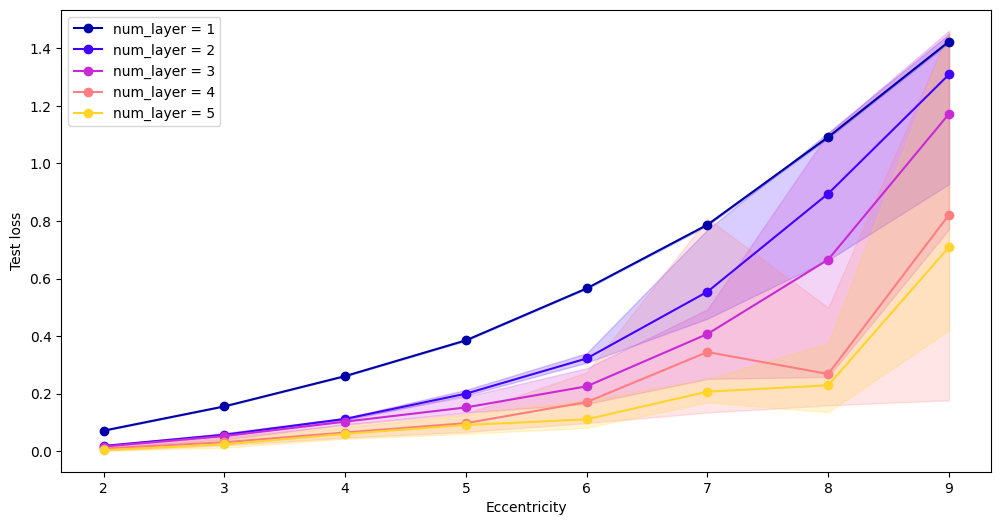

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
key0s = all_scores.keys()
key0s = np.sort(list(key0s))
for key0 in key0s:
    c = mpl.colormaps["gnuplot2"](key0 / (max(key0s) + 1))
    ecc_layer_loss_plot(ax, all_scores[key0], f"num_layer = {key0}", c, "-", "o")
# plt.savefig("./figures/cmp_num_graphs.pdf")